# iPhone Customer Reviews Analysis

# 1: Importing Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

# 2: Data Loading

In [2]:
df = pd.read_csv(r"C:\Users\Hp\Downloads\iphone.csv")
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98


# 3: Data Exploration

In [3]:
df.shape

(3062, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3062 entries, 0 to 3061
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   productAsin        3062 non-null   object
 1   country            3062 non-null   object
 2   date               3062 non-null   object
 3   isVerified         3062 non-null   bool  
 4   ratingScore        3062 non-null   int64 
 5   reviewTitle        3062 non-null   object
 6   reviewDescription  2976 non-null   object
 7   reviewUrl          3046 non-null   object
 8   reviewedIn         3062 non-null   object
 9   variant            3062 non-null   object
 10  variantAsin        3062 non-null   object
dtypes: bool(1), int64(1), object(9)
memory usage: 242.3+ KB


In [5]:
# Summary statistics
df.describe()


,ratingScore
count,3062.000000
mean,3.758981
std,1.579033
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
df.isnull().sum()

productAsin           0
country               0
date                  0
isVerified            0
ratingScore           0
reviewTitle           0
reviewDescription    86
reviewUrl            16
reviewedIn            0
variant               0
variantAsin           0
dtype: int64

In [7]:
df.dropna(inplace= True)

In [8]:
df.isnull().sum()

productAsin          0
country              0
date                 0
isVerified           0
ratingScore          0
reviewTitle          0
reviewDescription    0
reviewUrl            0
reviewedIn           0
variant              0
variantAsin          0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
country = df['country'].value_counts(normalize=True) * 100
country

country
India                   72.500000
United States           19.459459
Japan                    5.337838
United Arab Emirates     2.702703
Name: proportion, dtype: float64

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


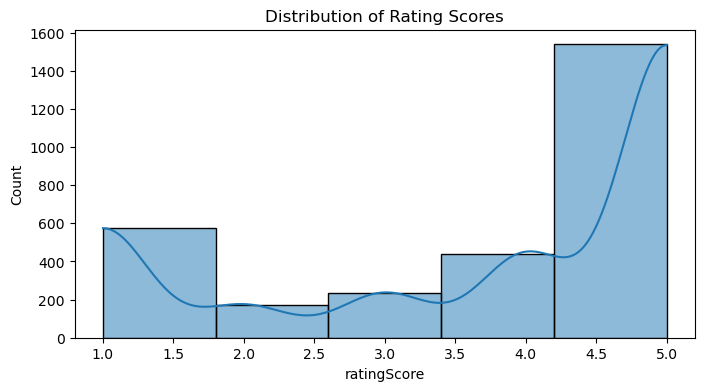

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.histplot(df['ratingScore'], bins=5, kde=True)
plt.title('Distribution of Rating Scores')
plt.show()




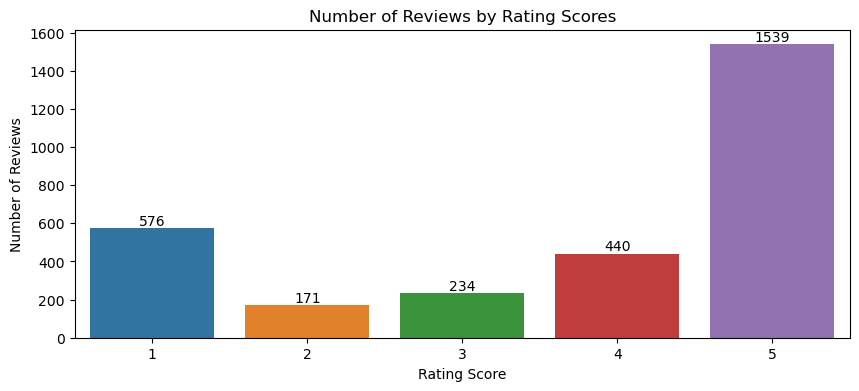

In [12]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(x='ratingScore', data=df)
plt.title('Number of Reviews by Rating Scores')
plt.xlabel('Rating Score')
plt.ylabel('Number of Reviews')

# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


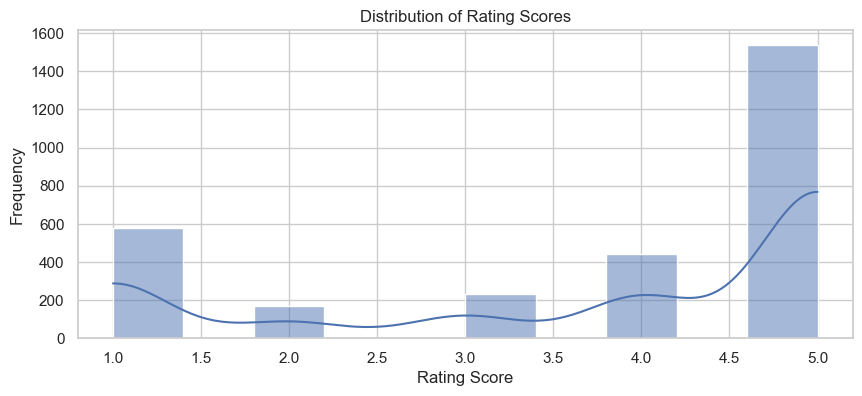

In [13]:
# Set the aesthetics for seaborn
sns.set(style="whitegrid")

# 1. Distribution of Rating Scores
plt.figure(figsize=(10, 4))
sns.histplot(df['ratingScore'], bins=10, kde=True)
plt.title('Distribution of Rating Scores')
plt.xlabel('Rating Score')
plt.ylabel('Frequency')
plt.show()

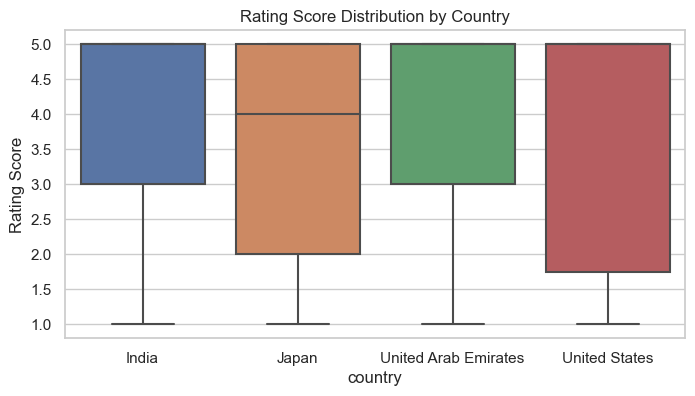

In [14]:
plt.figure(figsize = (8,4))
sns.boxplot(data=df, x='country', y='ratingScore')
plt.title('Rating Score Distribution by Country')
plt.ylabel('Rating Score')
plt.show()

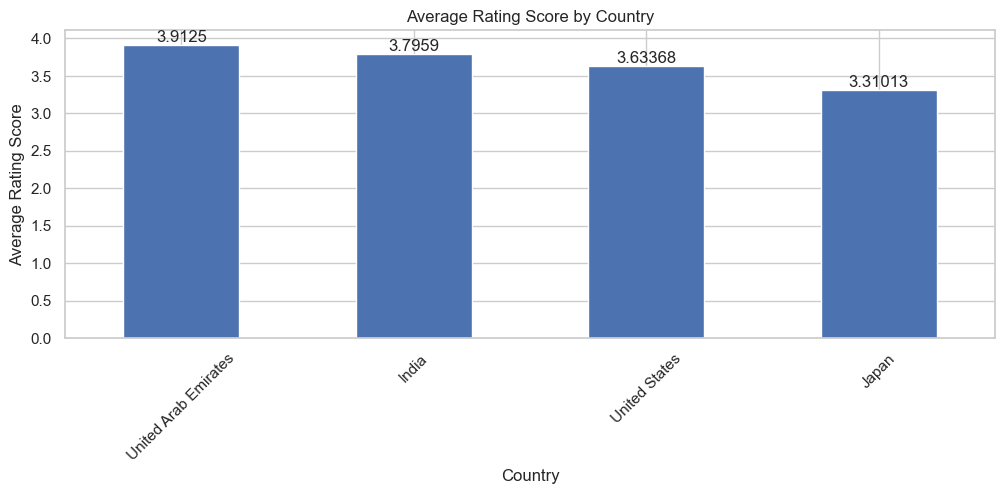

In [15]:
plt.figure(figsize=(12, 4))
country_ratings = df.groupby('country')['ratingScore'].mean().sort_values(ascending=False)
ax = country_ratings.plot(kind='bar')
plt.title('Average Rating Score by Country')
plt.xlabel('Country')
plt.ylabel('Average Rating Score')
plt.xticks(rotation=45)

for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


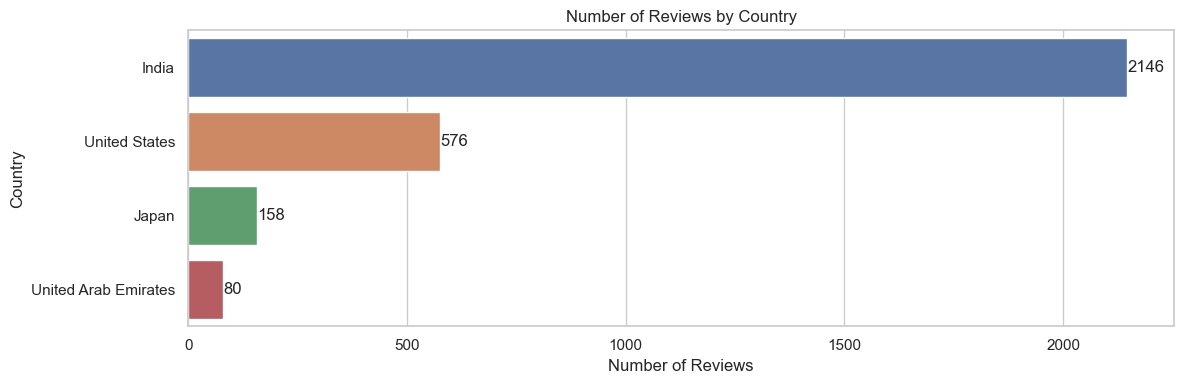

In [16]:
plt.figure(figsize=(12, 4))
ax = sns.countplot(y='country', data=df, order=df['country'].value_counts().index)
# Reviews by Country

# Set the title and labels
plt.title('Number of Reviews by Country')
plt.xlabel('Number of Reviews')
plt.ylabel('Country')

# Add labels to the bars
for bars in ax.containers:
    ax.bar_label(bars)

# Adjust layout
plt.tight_layout()  
plt.show()

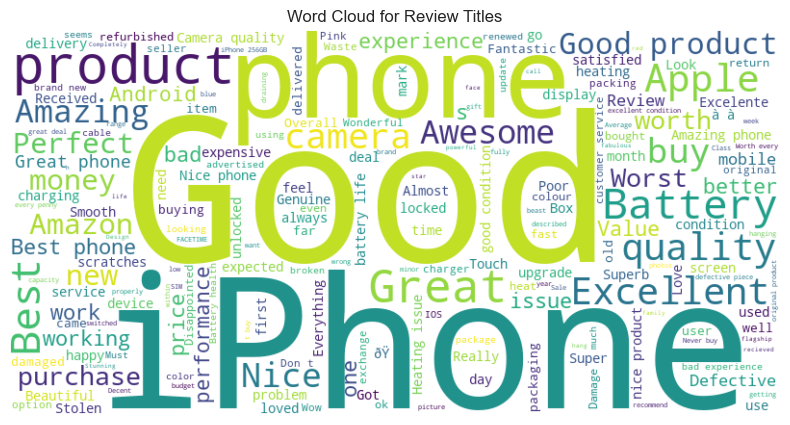

In [17]:
from wordcloud import WordCloud
### 5. Word Cloud for Review Titles
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['reviewTitle'].dropna()))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Review Titles')
plt.show()

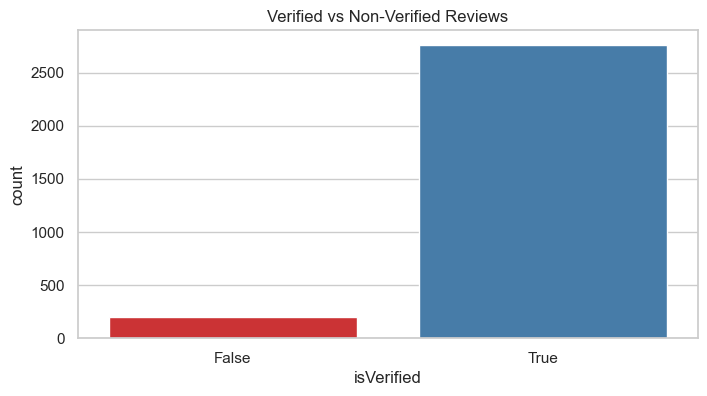

In [29]:
# Compare the number of verified and non-verified reviews
plt.figure(figsize=(8, 4))
sns.countplot(x='isVerified', data=df, palette='Set1')
plt.title('Verified vs Non-Verified Reviews')
plt.show()


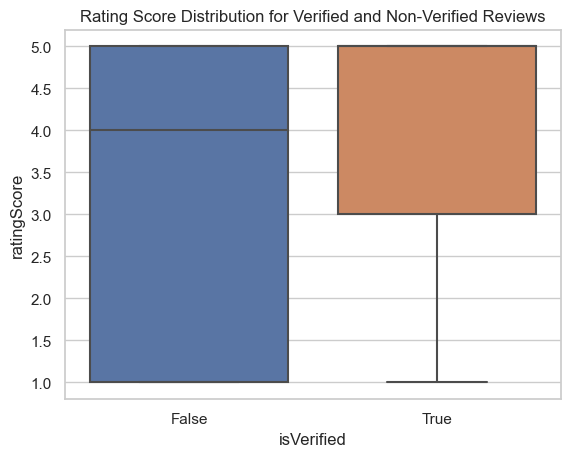

In [19]:
# Verified vs Non-Verified Reviews comparison
sns.boxplot(x='isVerified', y='ratingScore', data=df)
plt.title('Rating Score Distribution for Verified and Non-Verified Reviews')
plt.show()


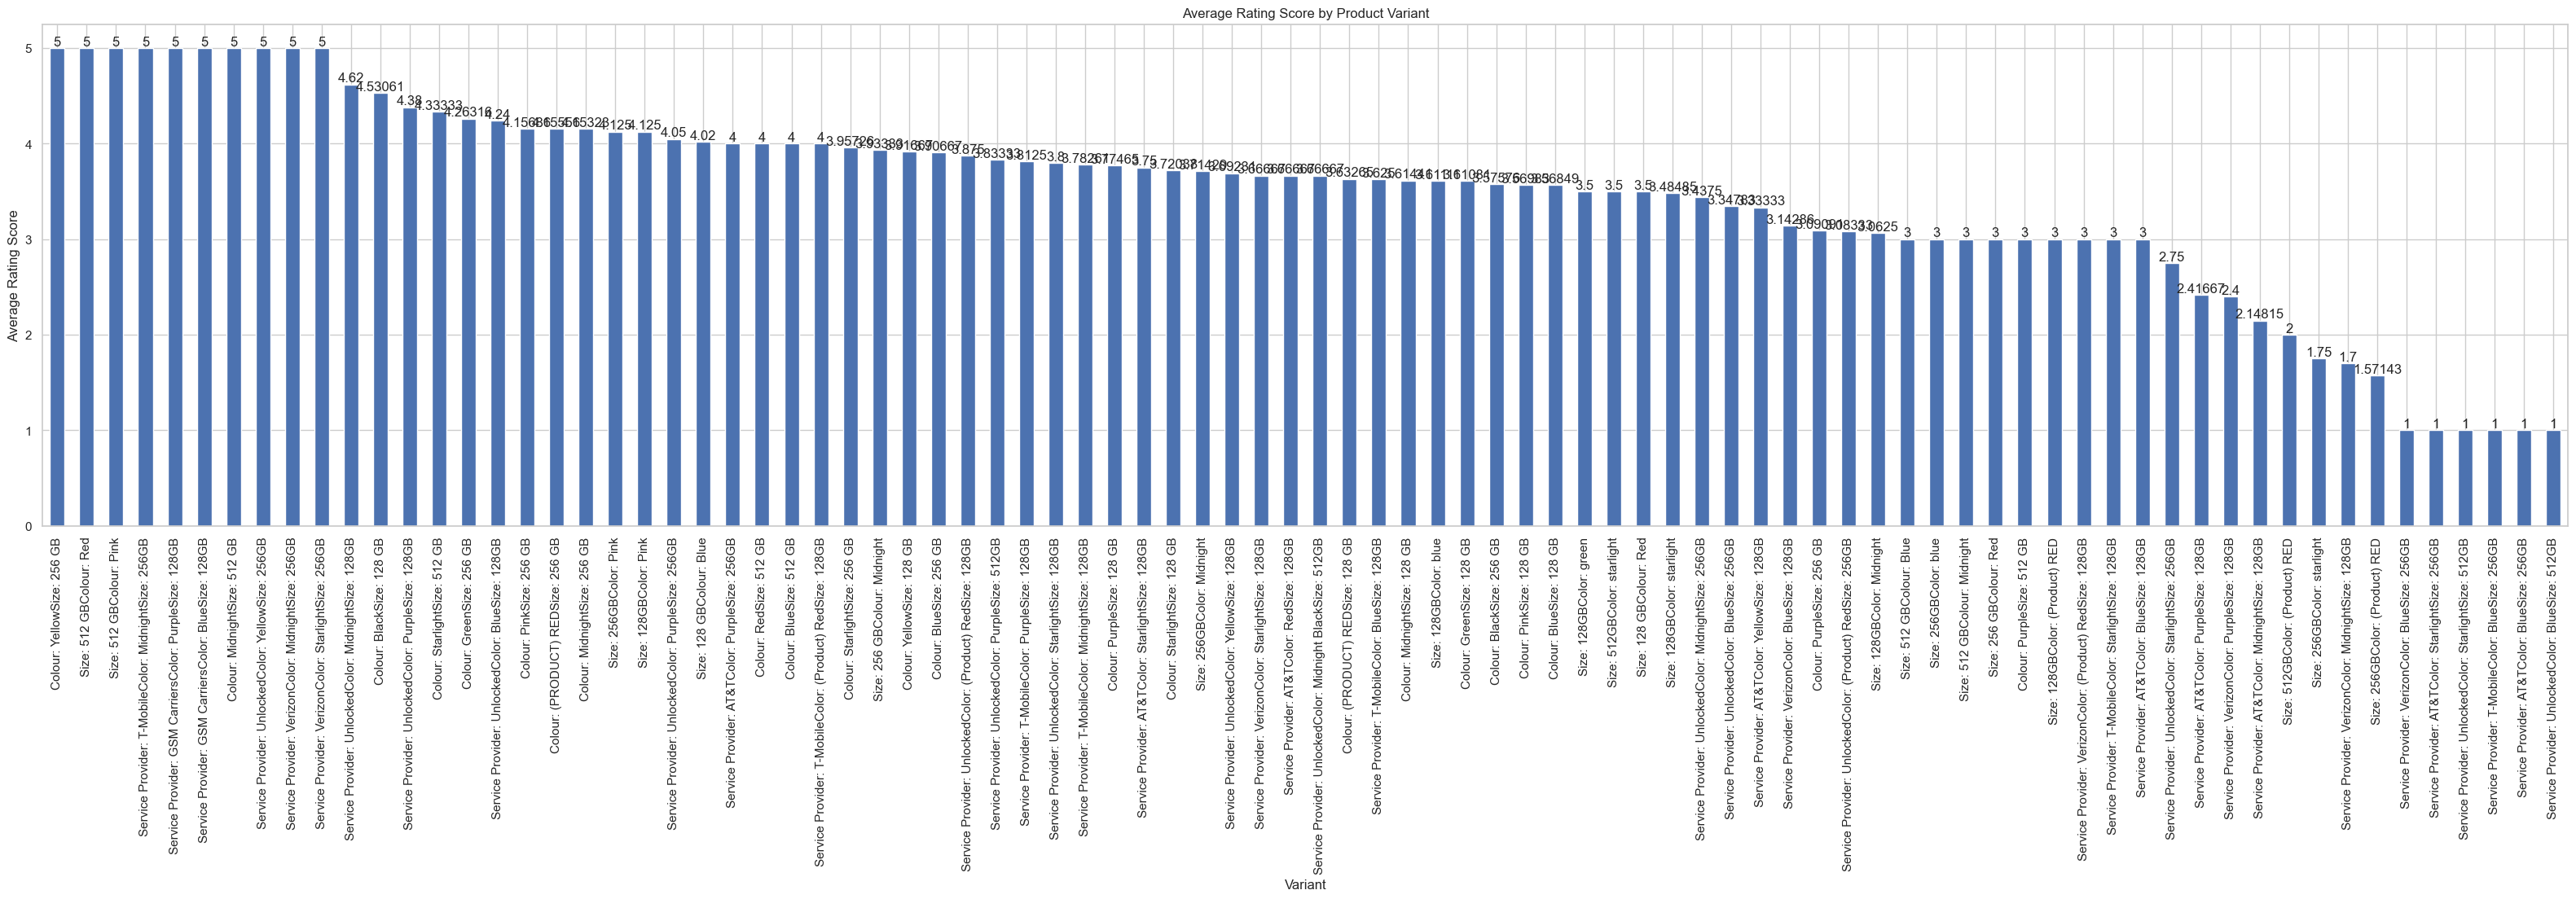

In [20]:
plt.figure(figsize=(40, 8))
variant_ratings = df.groupby('variant')['ratingScore'].mean().sort_values(ascending=False)
ax = variant_ratings.plot(kind='bar')
plt.title('Average Rating Score by Product Variant')
plt.xlabel('Variant')
plt.ylabel('Average Rating Score')
plt.xticks(rotation=90)

# Adding bar labels
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()


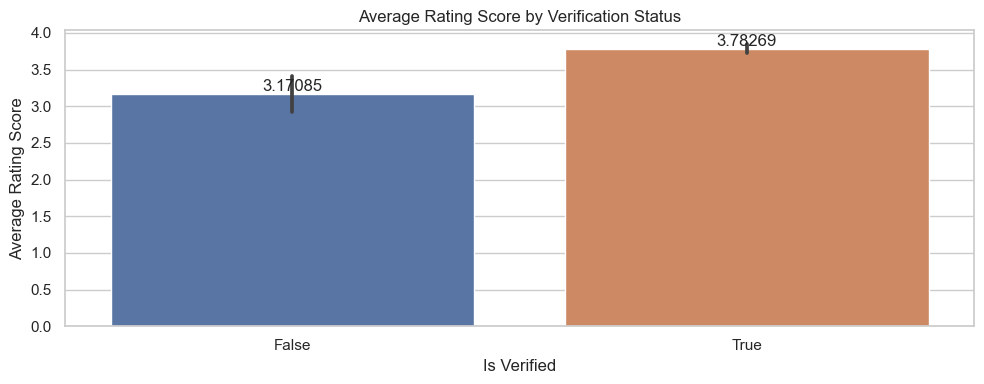

In [21]:
# 2. Verified vs Non-Verified Reviews
plt.figure(figsize=(10, 4))
ax = sns.barplot(x='isVerified', y='ratingScore', data=df, estimator='mean')
plt.title('Average Rating Score by Verification Status')
plt.xlabel('Is Verified')
plt.ylabel('Average Rating Score')
# Add bar labels
for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()
plt.show()

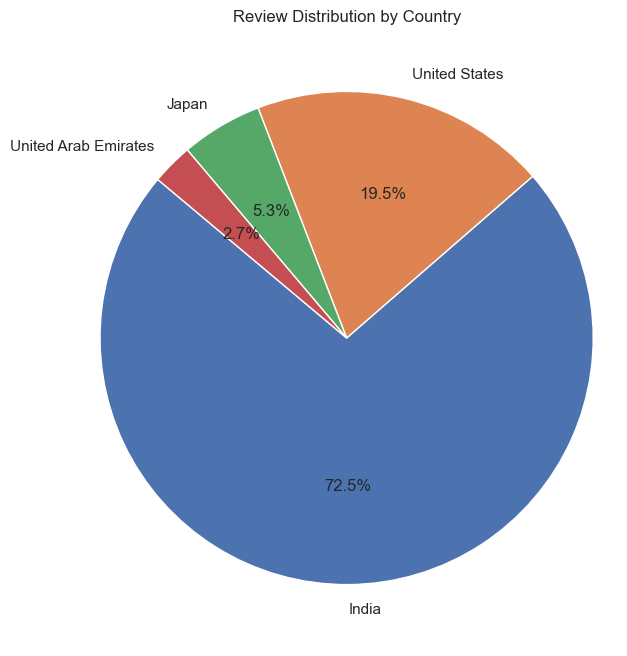

In [22]:
# 4. Pie Chart for Review Distribution by Country
country_counts = df['country'].value_counts()

plt.figure(figsize=(7, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Review Distribution by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()

In [23]:
def create_pie_chart(df, column_name, title=None, colors=None):
    
    values = round(df[column_name].value_counts(normalize=True) * 100, 2)
    
    labels = values.index.tolist()
    values = values.values.tolist()
    
    if title is None:
        title = f'Distribution of {column_name.capitalize()}'
    
    plt.figure(figsize=(8, 8))
    plt.pie(values, autopct='%1.1f%%', colors=colors, 
            startangle=90, counterclock=False, 
            wedgeprops={'edgecolor': 'white', 'linewidth': 1})

    plt.title(title, fontsize=16)

    plt.legend(labels, title=column_name.capitalize(), loc='upper right', bbox_to_anchor=(1.2, 1))

    
    plt.show()

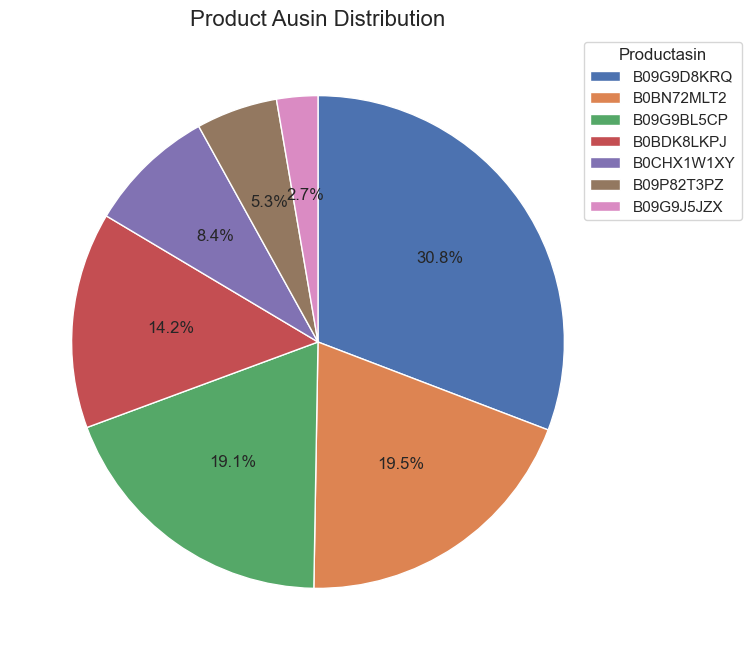

In [24]:
create_pie_chart(df, 'productAsin', title = 'Product Ausin Distribution')

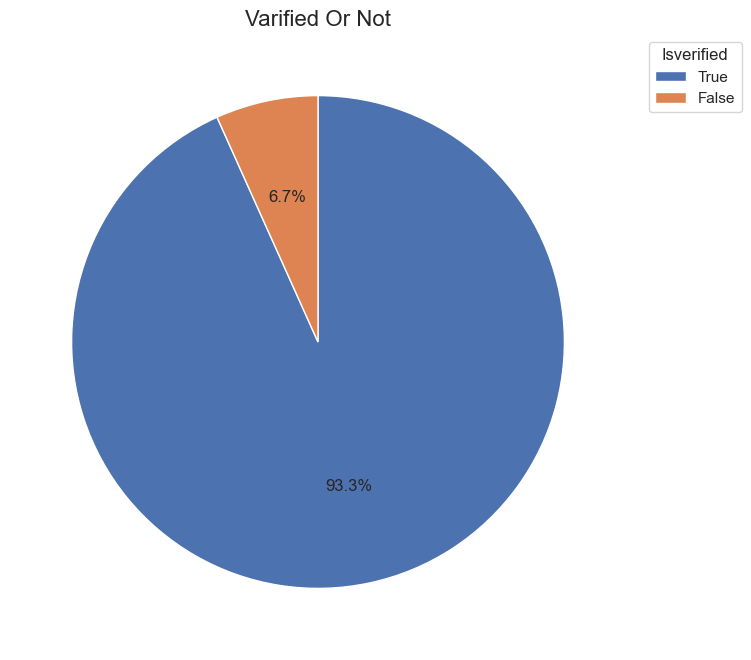

In [25]:
create_pie_chart(df, 'isVerified', title = 'Varified Or Not')

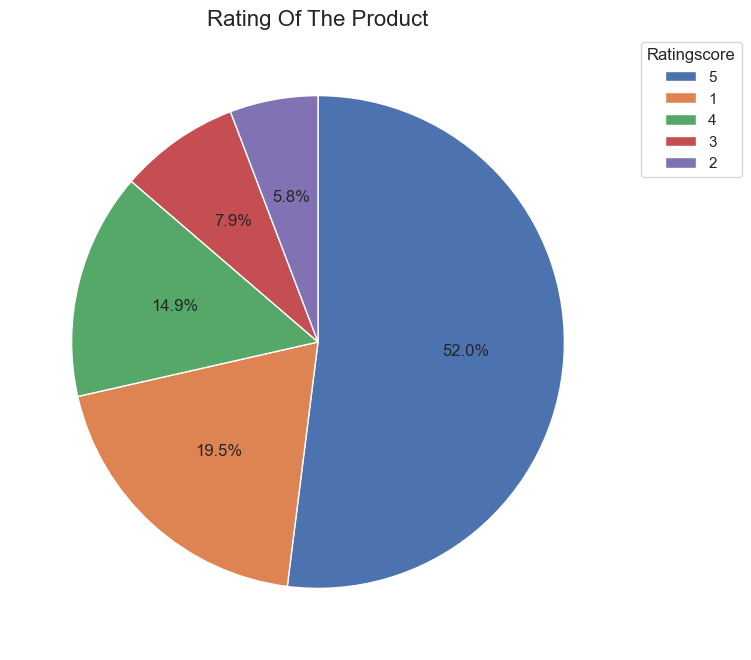

In [26]:
create_pie_chart(df, 'ratingScore', title = 'Rating Of The Product')

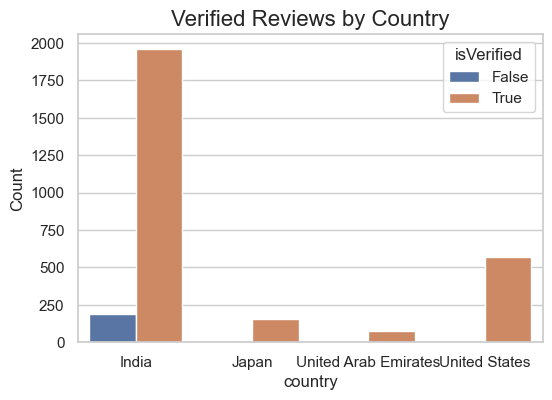

In [27]:
plt.figure(figsize = (6,4))
sns.countplot(data=df, x='country', hue='isVerified')
plt.title('Verified Reviews by Country',fontsize = 16)
plt.ylabel('Count')
plt.show()

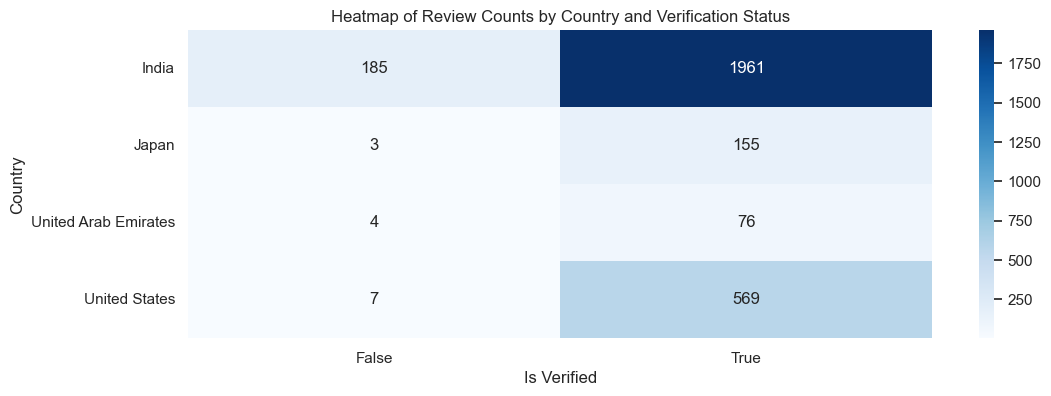

In [28]:
#  Heatmap of Review Counts by Country and Verification Status

country_verification_counts = df.groupby(['country', 'isVerified']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 4))
sns.heatmap(country_verification_counts, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap of Review Counts by Country and Verification Status')
plt.xlabel('Is Verified')
plt.ylabel('Country')
plt.show()